In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb
import mesa_reader as mr
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})

In [7]:
star_mass = np.array([5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
Z_dir = ['2Z/','1Z/','01Z/','001Z/']
Z = ['2Z','1Z','01Z','001Z']
E_dir = ['Egrav','Ebind','Ehe','Etot']
metalicity = [0.03,0.0142,0.00142,0.000142]
z = 0.0014 # [0.03, 0.014, 0.0014, 0.00014] #2x 1x 0.1X and 0.01X solar metalicity
G = 6.67e-8  #CGS

rsol = 6.957e10 #CGS
msol = 1.989e33 #CGS

#Ebind, Etot, Ehe, Egrav

def quad(x, a, b ,c):
    return a*x**2 + b*x + c

def linear(xdata, m, b):
    return m*xdata + b

def fix_linear(xdata,b):
    return xdata+b

# Plot the Curves of lambda to look at 

For Egrav

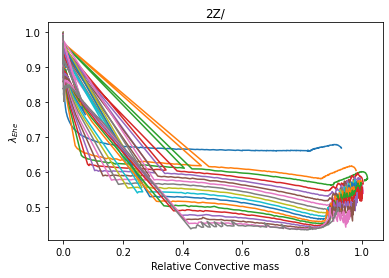

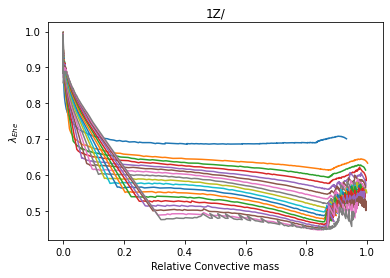

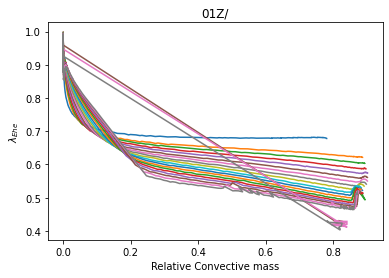

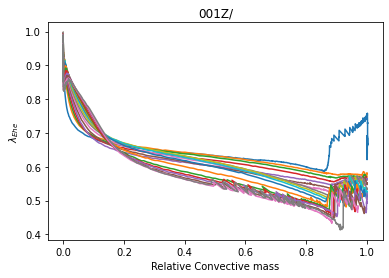

In [9]:
# plot the curves for a look see

for i in range(len(Z_dir)):
    for j in range(len(star_mass)):
        data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] + str(star_mass[j])+'M_data.csv')
        l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Egrav_conv*data.radius*rsol)
        M_conv_max = data.M_conv_max[0]
        plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]))
    # plt.legend()
    plt.xlabel('Relative Convective mass')
    plt.ylabel('$\lambda_{Ehe}$')
    plt.title(Z_dir[i])
    # plt.ylim(0.8,3.5)
    # plt.ylim(0.8,3)
    #plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/Egrav/' + Z[i] + '.pdf' , format = 'pdf')
    plt.show()


For Ebind

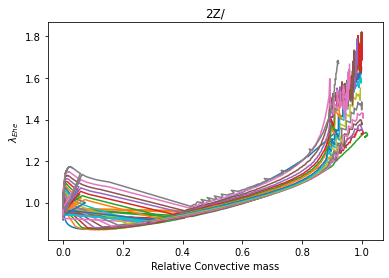

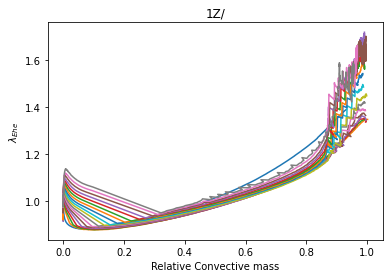

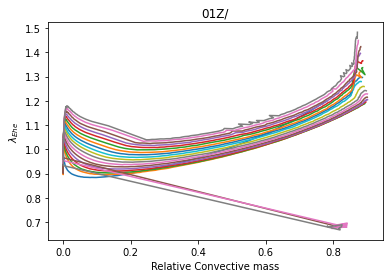

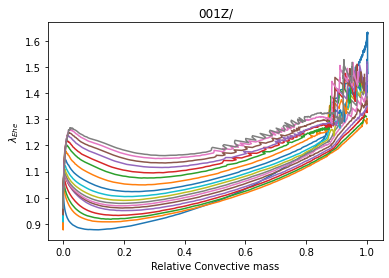

In [4]:
for i in range(len(Z_dir)):
    for j in range(len(star_mass)):
        data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] + str(star_mass[j])+'M_data.csv')
        l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ebind_conv*data.radius*rsol)
        M_conv_max = data.M_conv_max[0]
        plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]))
    # plt.legend()
    plt.xlabel('Relative Convective mass')
    plt.ylabel('$\lambda_{Ehe}$')
    plt.title(Z_dir[i])
    # plt.ylim(0.8,3.5)
    # plt.ylim(0.8,3)
    #plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/Egrav/' + Z[i] + '.pdf' , format = 'pdf')
    plt.show()

For helium recombination

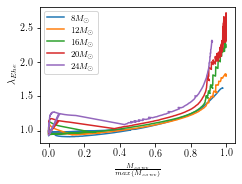

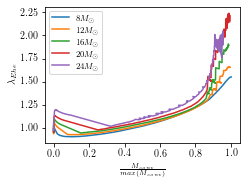

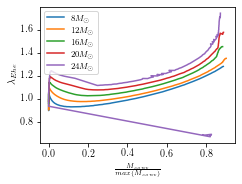

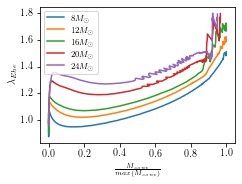

In [8]:
star_mass = np.array([8,12,16,20,24])
Z = ['2Z','1Z','01Z','001Z']
for i in range(len(Z_dir)):
    plt.figure(figsize=(3.5, 2.5))
    for j in range(len(star_mass)):
        data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] + str(star_mass[j])+'M_data.csv')
        l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
        M_conv_max = data.M_conv_max[0]
        plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$')
    plt.legend(fontsize = 'small', loc = 'upper left')
    plt.xlabel('$\\frac{M_{conv}}{max(M_{conv})}$')
    plt.ylabel('$\lambda_{Ehe}$')
#     plt.title(Z_dir[i])
    # plt.ylim(0.8,3.5)
    # plt.ylim(0.8,3)
    plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda/' + Z[i] + 'lambda.pdf' , format = 'pdf', bbox_inches = 'tight')
    plt.show()

For total recombination energy

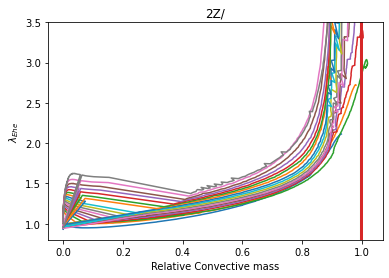

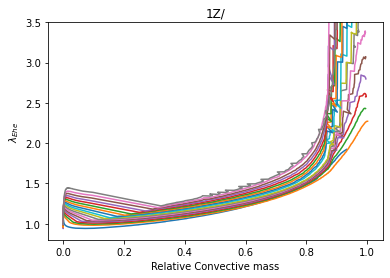

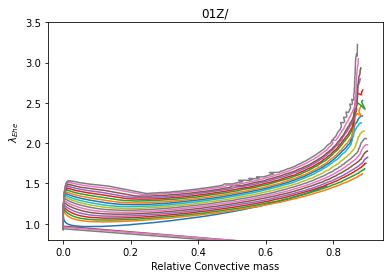

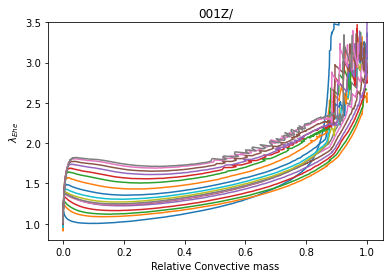

In [6]:
for i in range(len(Z_dir)):
    for j in range(len(star_mass)):
        data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] + str(star_mass[j])+'M_data.csv')
        l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol)
        M_conv_max = data.M_conv_max[0]
        plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]))
    # plt.legend()
    plt.xlabel('Relative Convective mass')
    plt.ylabel('$\lambda_{Ehe}$')
    plt.title(Z_dir[i])
    plt.ylim(0.8,3.5)
    # plt.ylim(0.8,3)
    #plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/Egrav/' + Z[i] + '.pdf' , format = 'pdf')
    plt.show()

# Now use the linear models with constant gradient and varying intercepts for Lambda values. 

The gradient will be calculated from a mask linear fit of the 15Msol curve where the mask is from (0.3 to 0.8) of the maximum convective mass. 
This is done for each Binding energy values (Ehe, Ebind, Egrav, Etot) at each of the 4 metalicities.

I then plot log_e(lambda) against M_conv/M_conv_max

With fix gradient we then fit each mass of the stars (5 to 24) with a linear model that flattens below 0.3 Mconvmax.

The gradient over metalicity can be treated as constant or can fitted with a quadratic. I.e 
$$
grad = a*log_{10}(Z)^2 +b*log_{10}(Z) + c
$$

The intercept is modeled linearly by: 

$$
Intercept = a*M_* + b 
$$

i =  0
The paramaters to the linear lambda fit are:
m = 0.6720463605733118 +/- 0.015016941737503337
b = -0.08666254042039719 +/- 0.008736501340756077


/home/lewis/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


i =  1
The paramaters to the linear lambda fit are:
m = 0.6283512629225351 +/- 0.014268011929495932
b = -0.10280569998609819 +/- 0.00831290924750572
i =  2
The paramaters to the linear lambda fit are:
m = 0.6704159331430777 +/- 0.019627762956749974
b = -0.04770726679894164 +/- 0.011839240089450392
i =  3
The paramaters to the linear lambda fit are:
m = 0.6209929200642005 +/- 0.01639270939718232
b = 0.04610624719214609 +/- 0.009712750462835327
intercept_2Z =  [-0.175045186349003, -0.157662046385223, -0.1663403391971423, -0.1473639386512582, -0.13635522566734595, -0.12446237767975576, -0.11412791588922921, -0.10056292355189989, -0.08666254039760068, -0.07196847147146279, -0.05793160303937594, -0.04117969376618236, -0.025260883693272618, -0.00927941628433393, 0.013430716505570484, 0.04074661214644382, 0.07628874461940656, 0.08651347025513201]
intercept_1Z =  [-0.16939400097145982, -0.16719573922711617, -0.15421829089115424, -0.14468370672209385, -0.13582096919502495, -0.12759776490200903,

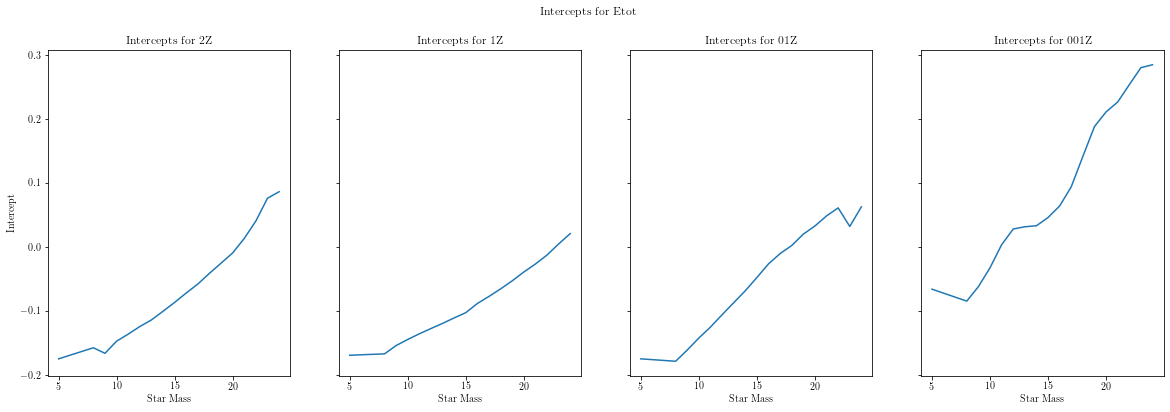

In [11]:
gradient = []
intercept_2Z = []
intercept_1Z = []
intercept_01Z = []
intercept_001Z = []

#define what energy we are cosidering in the lambda calculations.
energy_string = 'Etot'

for i in range(len(Z_dir)):
    print('i = ', i)
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] +'15M_data.csv') #fit to 15Msol
    log_lambda = np.log(-(G*15*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol))
    M_conv_max = data.M_conv_max[0]
    MaskMconv= [data.M_conv_env[i] for i in range(len(data.M_conv_env)) if (0.8 > data.M_conv_env[i]/M_conv_max > 0.3)]
    mask_lambda = [log_lambda[i] for i in range(len(data.M_conv_env)) if (0.8 > data.M_conv_env[i]/M_conv_max > 0.3)]
    popt, pcov = curve_fit(linear, MaskMconv/M_conv_max, mask_lambda)
    gradient.append(popt[0])
    grad = popt[0]
    print("The paramaters to the linear lambda fit are:")
    print("m =", popt[0], "+/-", pcov[0,0]**0.5)
    print("b =", popt[1], "+/-", pcov[1,1]**0.5)
    plt.plot(data.M_conv_env/M_conv_max, linear(data.M_conv_env/M_conv_max,*popt), label = 'Linear Fit to 15Msol')
    for j in range(len(star_mass)):
        data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ Z_dir[i] + str(star_mass[j]) +'M_data.csv')
        log_lambda = np.log(-(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol))
        M_conv_max = data.M_conv_max[0]
        MaskMconv= np.array([data.M_conv_env[i] for i in range(len(data.M_conv_env)) if (0.8 > data.M_conv_env[i]/M_conv_max > 0.3)])
        mask_lambda = np.array([log_lambda[i] for i in range(len(data.M_conv_env)) if (0.8 > data.M_conv_env[i]/M_conv_max > 0.3)])
        popt, pcov = curve_fit(fix_linear,  grad*MaskMconv/M_conv_max, mask_lambda)
        plt.plot(data.M_conv_env/M_conv_max, log_lambda,label = str(star_mass[j]))
        plt.plot(data.M_conv_env/M_conv_max, fix_linear(grad*data.M_conv_env/M_conv_max,popt[0]), label = 'Linear fit')
        plt.xlabel('Relative convective mass')
        plt.ylabel('$Log(\lambda)$')
        plt.legend()
        if i == 0:
            intercept_2Z.append(popt[0])
            plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/'+ energy_string+'/2Z/' +str(star_mass[j])+ 'M.pdf',format = 'pdf')
            plt.close()
        elif i == 1:
            intercept_1Z.append(popt[0])
            plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/'+ energy_string+'/1Z/' +str(star_mass[j])+ 'M.pdf',format = 'pdf')
            plt.close()
        elif i == 2:
            intercept_01Z.append(popt[0])
            plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/'+ energy_string+'/01Z/' +str(star_mass[j])+ 'M.pdf',format = 'pdf')
            plt.close()
        elif i == 3:
            intercept_001Z.append(popt[0])
            plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/'+ energy_string+'/001Z/' +str(star_mass[j])+ 'M.pdf',format = 'pdf')
            plt.close()

print('intercept_2Z = ', intercept_2Z )
print('intercept_1Z = ', intercept_1Z )
print('intercept_01Z = ', intercept_01Z )
print('intercept_001Z = ', intercept_001Z )
print('Gradient = ', gradient)


fig, axs = plt.subplots(1, 4, sharey=True, sharex=True, figsize = (20,6))
axs[0].plot(star_mass, intercept_2Z)
axs[0].set_ylabel('Intercept')
axs[0].set_title('Intercepts for 2Z')
axs[0].set_xlabel('Star Mass')
axs[1].plot(star_mass, intercept_1Z)
axs[1].set_title('Intercepts for 1Z')
axs[1].set_xlabel('Star Mass')
axs[2].plot(star_mass, intercept_01Z)
axs[2].set_title('Intercepts for 01Z')
axs[2].set_xlabel('Star Mass')
axs[3].plot(star_mass, intercept_001Z)
axs[3].set_title('Intercepts for 001Z')
axs[3].set_xlabel('Star Mass')
fig.suptitle('Intercepts for ' + energy_string)
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Lambda_fits/'+ energy_string +'/intercepts.pdf')
plt.show()
plt.close()

names = ['intercept_2Z', 'intercept_1Z','intercept_01Z', 'intercept_001Z','grad']
table = [intercept_2Z, intercept_1Z,intercept_01Z,intercept_001Z,gradient]

df = pd.DataFrame(table)
df = df.T
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/' +energy_string+'_fit_param.csv', index=True, header=names, sep=',') #save the path to your data files



# Now make a quadratic fit for the gradients over metalicity and a linear model of the intercepts.

If the gradients dont vary that much over metalicity then just get the average. 

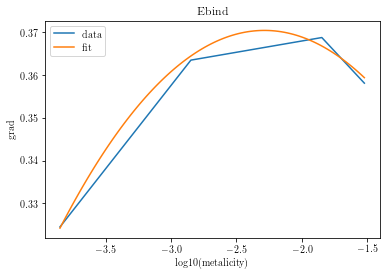

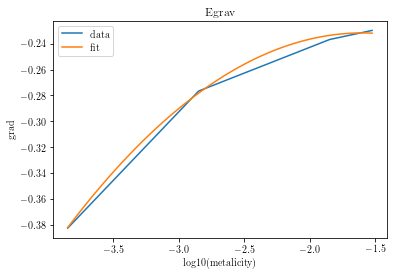

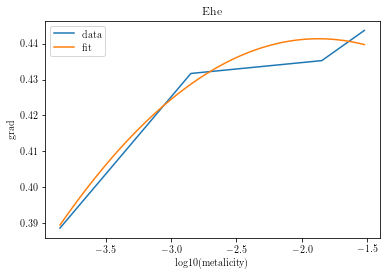

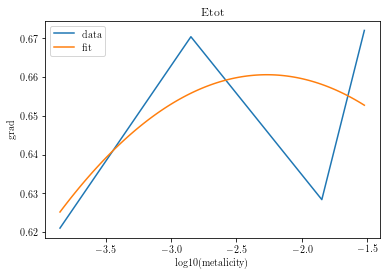

In [12]:
log_metal = np.log10(metalicity)
dom = np.linspace(log_metal[0],log_metal[-1],100)
E_dir = ['Ebind','Egrav','Ehe','Etot']

for i in E_dir:
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Lambda/'+ i +'_fit_param.csv')
    grad = data.grad[:4]
    popt, pcov = curve_fit(quad, log_metal, grad)
    if i == 'Ebind':
        m_Ebind_param = popt
        plt.plot(log_metal,grad, label = 'data')
        plt.plot(dom, quad(dom,*popt), label = 'fit')
        plt.xlabel('log10(metalicity)')
        plt.ylabel('grad')
        plt.title(i)
        plt.legend()
        plt.show()
    elif i == 'Ehe':
        m_Ehe_param = popt
        plt.plot(log_metal,grad, label = 'data')
        plt.plot(dom, quad(dom,*popt), label = 'fit')
        plt.xlabel('log10(metalicity)')
        plt.ylabel('grad')
        plt.title(i)
        plt.legend()
        plt.show()   
    elif i == 'Egrav':
        m_Egrav_param = popt
        plt.plot(log_metal,grad, label = 'data')
        plt.plot(dom, quad(dom,*popt), label = 'fit')
        plt.xlabel('log10(metalicity)')
        plt.ylabel('grad')
        plt.title(i)
        plt.legend()
        plt.show()
    elif i == 'Etot':
        m_Etot_param = popt
        plt.plot(log_metal,grad, label = 'data')
        plt.plot(dom, quad(dom,*popt), label = 'fit')
        plt.xlabel('log10(metalicity)')
        plt.ylabel('grad')
        plt.title(i)
        plt.legend()
        plt.show()

        
names = ['m_Ebind_param', 'm_Ehe_param', 'm_Egrav_param', 'm_Etot_param']
table = [m_Ebind_param, m_Ehe_param, m_Egrav_param, m_Etot_param]
df = pd.DataFrame(table)
df = df.T
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/grad_fit_param.csv', index=True, header=names, sep=',')


        
#Based on these plots I think its best to use the average gradient rather than fitting a quartratic too it.         
        


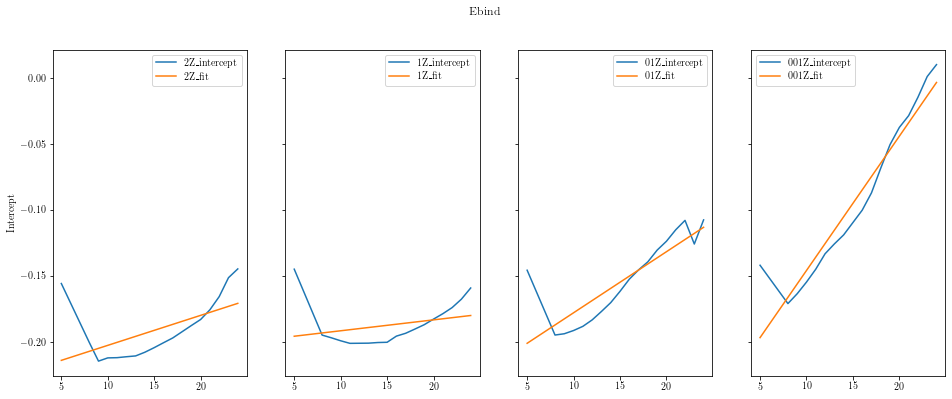

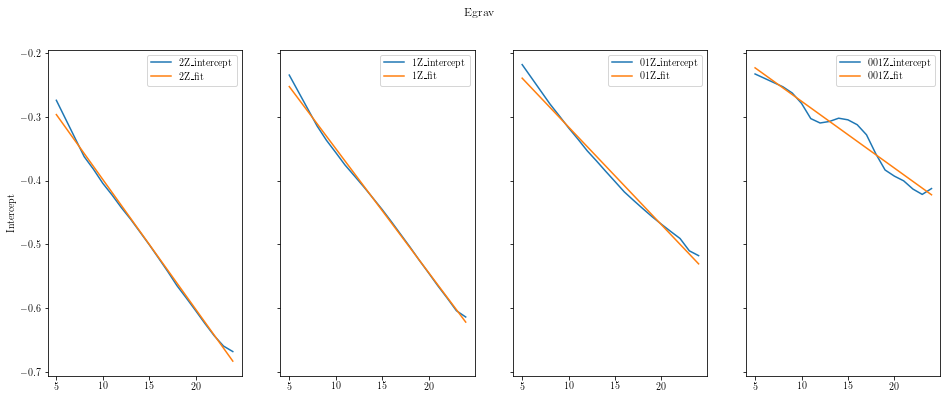

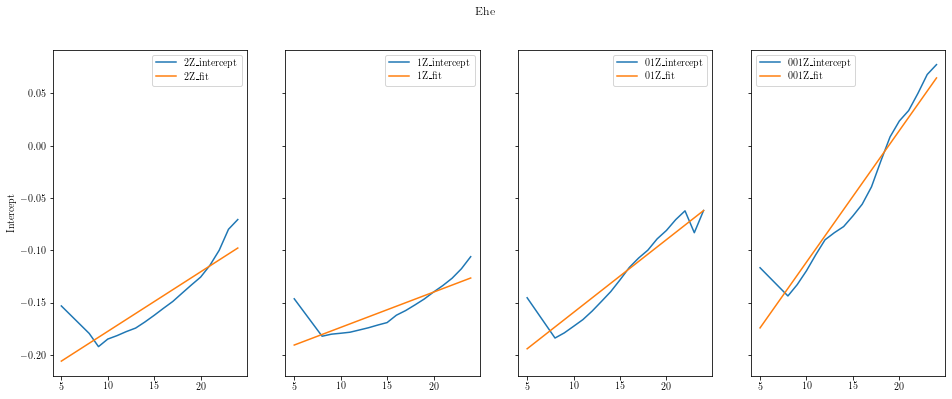

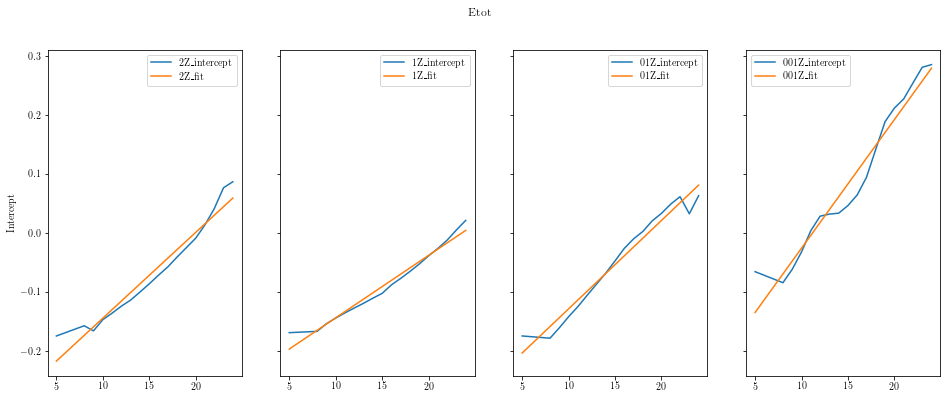

In [13]:
#fitting for the intercepts in Ebind, Ehe, Egrav, and Etot.

dom = np.linspace(star_mass[0],star_mass[-1],100)
for i in E_dir:
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Lambda/'+ i +'_fit_param.csv')
    intercept_01Z = data.intercept_01Z
    intercept_001Z = data.intercept_001Z
    intercept_2Z = data.intercept_2Z
    intercept_1Z = data.intercept_1Z
    popt, pcov = curve_fit(linear, star_mass, intercept_2Z)
    popt1, pcov1 = curve_fit(linear, star_mass, intercept_1Z)
    popt2, pcov2 = curve_fit(linear, star_mass, intercept_01Z)
    popt3, pcov3 = curve_fit(linear, star_mass, intercept_001Z)
    if i == 'Ebind':
        c_Ebind_2Z_param = popt
        c_Ebind_1Z_param = popt1
        c_Ebind_01Z_param = popt2
        c_Ebind_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[1].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[1].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[2].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[2].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[3].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[3].plot(dom, linear(dom,*popt3), label = '001Z_fit')
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        ax[3].legend()
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()

    
    elif i == 'Ehe':
        c_Ehe_2Z_param = popt
        c_Ehe_1Z_param = popt1
        c_Ehe_01Z_param = popt2
        c_Ehe_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[1].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[1].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[2].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[2].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[3].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[3].plot(dom, linear(dom,*popt3), label = '001Z_fit')
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        ax[3].legend()
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()
    elif i == 'Etot':
        c_Etot_2Z_param = popt
        c_Etot_1Z_param = popt1
        c_Etot_01Z_param = popt2
        c_Etot_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[1].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[1].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[2].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[2].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[3].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[3].plot(dom, linear(dom,*popt3), label = '001Z_fit')
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        ax[3].legend()
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()
    if i == 'Egrav':
        c_Egrav_2Z_param = popt
        c_Egrav_1Z_param = popt1
        c_Egrav_01Z_param = popt2
        c_Egrav_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[1].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[1].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[2].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[2].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[3].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[3].plot(dom, linear(dom,*popt3), label = '001Z_fit')
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        ax[3].legend()
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()

names = ['c_Ehe_2Z_param', 'c_Ehe_1Z_param', 'c_Ehe_01Z_param', 'c_Ehe_001Z_param', 'c_Ebind_2Z_param', 'c_Ebind_1Z_param', 'c_Ebind_01Z_param', 'c_Ebind_001Z_param', 'c_Egrav_2Z_param', 'c_Egrav_1Z_param', 'c_Egrav_01Z_param', 'c_Egrav_001Z_param', 'c_Etot_2Z_param', 'c_Etot_1Z_param', 'c_Etot_01Z_param', 'c_Etot_001Z_param']
table = [c_Ehe_2Z_param, c_Ehe_1Z_param, c_Ehe_01Z_param, c_Ehe_001Z_param, c_Ebind_2Z_param, c_Ebind_1Z_param, c_Ebind_01Z_param, c_Ebind_001Z_param,c_Egrav_2Z_param, c_Egrav_1Z_param, c_Egrav_01Z_param, c_Egrav_001Z_param,c_Etot_2Z_param, c_Etot_1Z_param, c_Etot_01Z_param, c_Etot_001Z_param]
df = pd.DataFrame(table)
df = df.T
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/intercepts_fit_param.csv', index=True, header=names, sep=',')


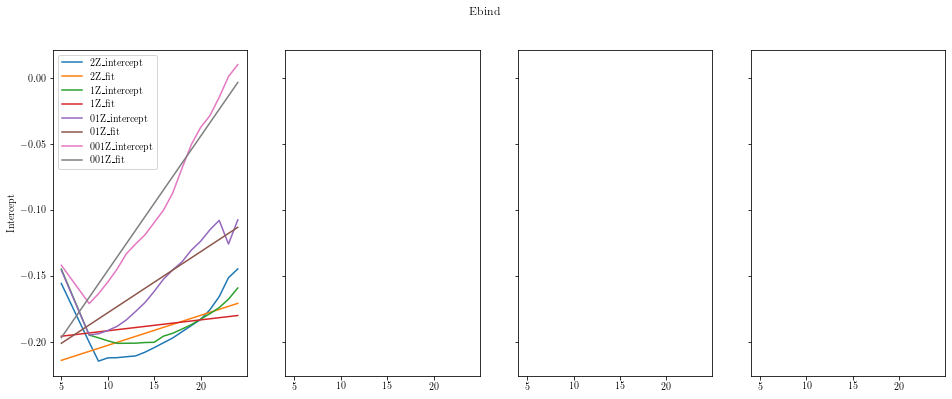

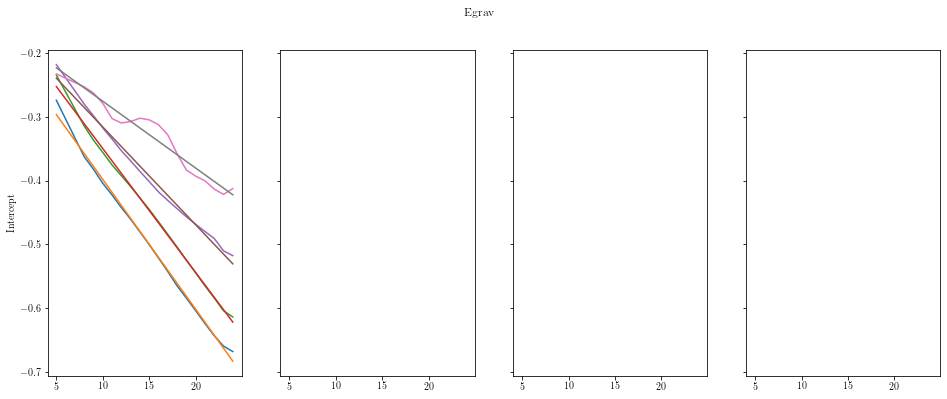

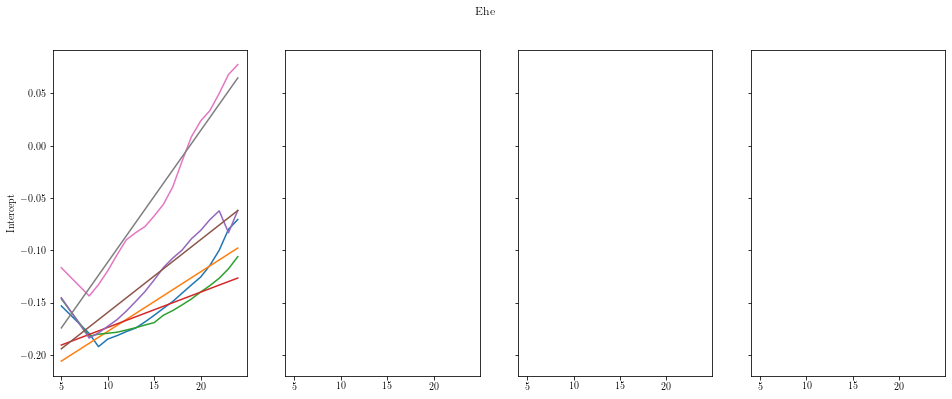

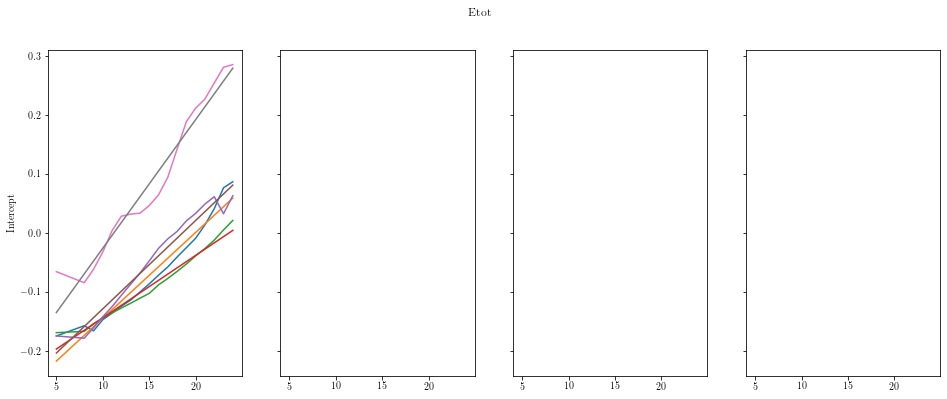

In [14]:
#fitting for the intercepts in Ebind, Ehe, Egrav, and Etot.

dom = np.linspace(star_mass[0],star_mass[-1],100)
for i in E_dir:
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Lambda/'+ i +'_fit_param.csv')
    intercept_01Z = data.intercept_01Z
    intercept_001Z = data.intercept_001Z
    intercept_2Z = data.intercept_2Z
    intercept_1Z = data.intercept_1Z
    popt, pcov = curve_fit(linear, star_mass, intercept_2Z)
    popt1, pcov1 = curve_fit(linear, star_mass, intercept_1Z)
    popt2, pcov2 = curve_fit(linear, star_mass, intercept_01Z)
    popt3, pcov3 = curve_fit(linear, star_mass, intercept_001Z)
    if i == 'Ebind':
        c_Ebind_2Z_param = popt
        c_Ebind_1Z_param = popt1
        c_Ebind_01Z_param = popt2
        c_Ebind_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[0].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[0].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[0].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[0].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[0].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[0].plot(dom, linear(dom,*popt3), label = '001Z_fit')
        ax[0].legend()
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()

    
    elif i == 'Ehe':
        c_Ehe_2Z_param = popt
        c_Ehe_1Z_param = popt1
        c_Ehe_01Z_param = popt2
        c_Ehe_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[0].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[0].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[0].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[0].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[0].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[0].plot(dom, linear(dom,*popt3), label = '001Z_fit')
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()
    elif i == 'Etot':
        c_Etot_2Z_param = popt
        c_Etot_1Z_param = popt1
        c_Etot_01Z_param = popt2
        c_Etot_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[0].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[0].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[0].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[0].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[0].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[0].plot(dom, linear(dom,*popt3), label = '001Z_fit')
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()
    if i == 'Egrav':
        c_Egrav_2Z_param = popt
        c_Egrav_1Z_param = popt1
        c_Egrav_01Z_param = popt2
        c_Egrav_001Z_param = popt3
        
        fig, ax = plt.subplots(1,4, sharey = True, sharex = True, figsize = (16,6))
        fig.suptitle(i)
        ax[0].plot(star_mass,intercept_2Z, label = '2Z_intercept')
        ax[0].plot(dom, linear(dom,*popt), label = '2Z_fit')
        ax[0].plot(star_mass,intercept_1Z, label = '1Z_intercept')
        ax[0].plot(dom, linear(dom,*popt1), label = '1Z_fit')
        ax[0].plot(star_mass,intercept_01Z, label = '01Z_intercept')
        ax[0].plot(dom, linear(dom,*popt2), label = '01Z_fit')
        ax[0].plot(star_mass,intercept_001Z, label = '001Z_intercept')
        ax[0].plot(dom, linear(dom,*popt3), label = '001Z_fit')
#         ax[0].xlabel('Star_mass (M$\odot$)')
        ax[0].set_ylabel('Intercept')
        plt.show()

names = ['c_Ehe_2Z_param', 'c_Ehe_1Z_param', 'c_Ehe_01Z_param', 'c_Ehe_001Z_param', 'c_Ebind_2Z_param', 'c_Ebind_1Z_param', 'c_Ebind_01Z_param', 'c_Ebind_001Z_param', 'c_Egrav_2Z_param', 'c_Egrav_1Z_param', 'c_Egrav_01Z_param', 'c_Egrav_001Z_param', 'c_Etot_2Z_param', 'c_Etot_1Z_param', 'c_Etot_01Z_param', 'c_Etot_001Z_param']
table = [c_Ehe_2Z_param, c_Ehe_1Z_param, c_Ehe_01Z_param, c_Ehe_001Z_param, c_Ebind_2Z_param, c_Ebind_1Z_param, c_Ebind_01Z_param, c_Ebind_001Z_param,c_Egrav_2Z_param, c_Egrav_1Z_param, c_Egrav_01Z_param, c_Egrav_001Z_param,c_Etot_2Z_param, c_Etot_1Z_param, c_Etot_01Z_param, c_Etot_001Z_param]
df = pd.DataFrame(table)
df = df.T
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/intercepts_fit_param.csv', index=True, header=names, sep=',')


# Now we need to see how the intercepts function changes with metalicity!

In this model I will use the average gradient over metalicities such that I will not draw the gradient from the quadratic since it apears more or less constant. 

Simillarly I will treat the intercept of the linear fit as constant over metalicities to simplyfy this result. 
I will however model the change of the gradient of the intercept fit since that is where we will get the step ladder effect. to do this I will use a quadratic. 

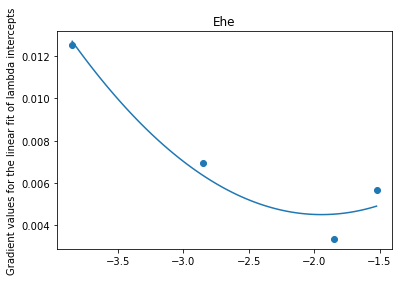

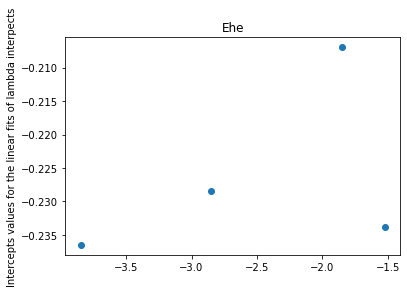

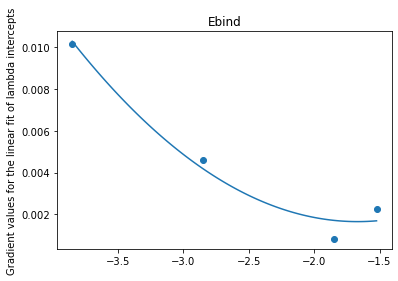

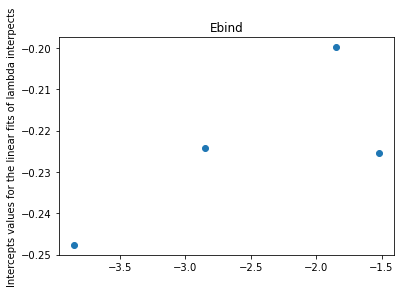

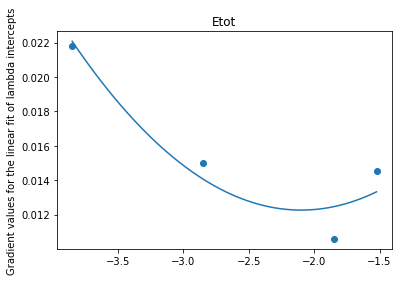

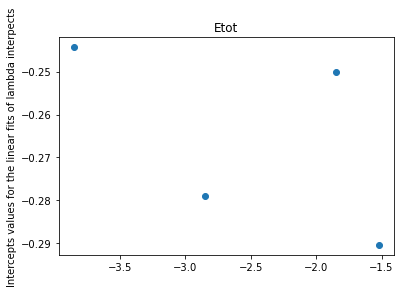

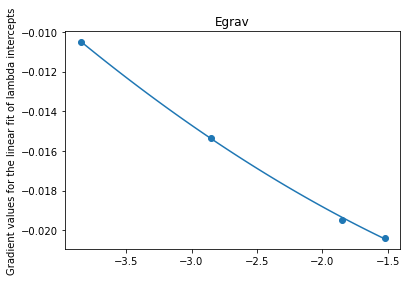

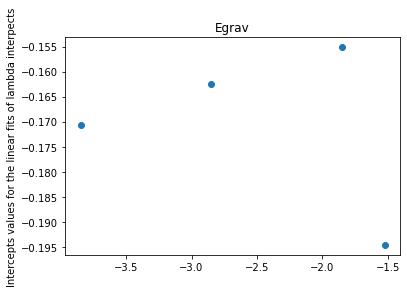

   Ebind_linear_grad_quad_fit  Ebind_average_grad  Ebind_average_intercept  \
0                    0.001818            0.353743                -0.224266   
1                    0.006063            0.353743                -0.224266   
2                    0.006712            0.353743                -0.224266   

   Egrav_linear_grad_quad_fit  Egrav_average_grad  Egrav_average_intercept  \
0                    0.000478           -0.281401                 -0.17072   
1                   -0.001716           -0.281401                 -0.17072   
2                   -0.024152           -0.281401                 -0.17072   

   Ehe_linear_grad_quad_fit  Ehe_average_grad  Ehe_average_intercept  \
0                  0.002258          0.424837              -0.226417   
1                  0.008775          0.424837              -0.226417   
2                  0.013040          0.424837              -0.226417   

   Etot_linear_grad_quad_fit  Etot_average_grad  Etot_average_intercept  
0          

In [91]:
log_metal = np.log10(metalicity)
dom = np.linspace(log_metal[0],log_metal[-1],100)
E_dir = ['Ebind','Egrav','Ehe','Etot']

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/intercepts_fit_param.csv')

Ehe_m = [data.c_Ehe_2Z_param[0],data.c_Ehe_1Z_param[0],data.c_Ehe_01Z_param[0],data.c_Ehe_001Z_param[0]]
Ehe_c = [data.c_Ehe_2Z_param[1],data.c_Ehe_1Z_param[1],data.c_Ehe_01Z_param[1],data.c_Ehe_001Z_param[1]]

Egrav_m = [data.c_Egrav_2Z_param[0],data.c_Egrav_1Z_param[0],data.c_Egrav_01Z_param[0],data.c_Egrav_001Z_param[0]]
Egrav_c = [data.c_Egrav_2Z_param[1],data.c_Egrav_1Z_param[1],data.c_Egrav_01Z_param[1],data.c_Egrav_001Z_param[1]]

Ebind_m = [data.c_Ebind_2Z_param[0],data.c_Ebind_1Z_param[0],data.c_Ebind_01Z_param[0],data.c_Ebind_001Z_param[0]]
Ebind_c = [data.c_Ebind_2Z_param[1],data.c_Ebind_1Z_param[1],data.c_Ebind_01Z_param[1],data.c_Ebind_001Z_param[1]]

Etot_m = [data.c_Etot_2Z_param[0],data.c_Etot_1Z_param[0],data.c_Etot_01Z_param[0],data.c_Etot_001Z_param[0]]
Etot_c = [data.c_Etot_2Z_param[1],data.c_Etot_1Z_param[1],data.c_Etot_01Z_param[1],data.c_Etot_001Z_param[1]]

#fit a qudratic to the changing gradient !
popt1, pcov1 = curve_fit(quad, log_metal, Ehe_m)
popt2, pcov2 = curve_fit(quad, log_metal, Ebind_m)
popt3, pcov3 = curve_fit(quad, log_metal, Etot_m)
popt4, pcov4 = curve_fit(quad, log_metal, Egrav_m)

plt.scatter(log_metal , Ehe_m)
plt.plot(dom, quad(dom,*popt1))
plt.ylabel('Gradient values for the linear fit of lambda intercepts')
plt.title('Ehe')
plt.show()
plt.scatter(log_metal, Ehe_c)
plt.ylabel('Intercepts values for the linear fits of lambda interpects')
plt.title('Ehe')
plt.show()

plt.scatter(log_metal , Ebind_m)
plt.plot(dom, quad(dom,*popt2))
plt.ylabel('Gradient values for the linear fit of lambda intercepts')
plt.title('Ebind')
plt.show()
plt.scatter(log_metal, Ebind_c)
plt.ylabel('Intercepts values for the linear fits of lambda interpects')
plt.title('Ebind')
plt.show()

plt.scatter(log_metal , Etot_m)
plt.plot(dom, quad(dom,*popt3))
plt.ylabel('Gradient values for the linear fit of lambda intercepts')
plt.title('Etot')
plt.show()
plt.scatter(log_metal, Etot_c)
plt.ylabel('Intercepts values for the linear fits of lambda interpects')
plt.title('Etot')
plt.show()

plt.scatter(log_metal , Egrav_m)
plt.plot(dom, quad(dom,*popt4))
plt.ylabel('Gradient values for the linear fit of lambda intercepts')
plt.title('Egrav')
plt.show()
plt.scatter(log_metal, Egrav_c)
plt.ylabel('Intercepts values for the linear fits of lambda interpects')
plt.title('Egrav')
plt.show()


#now save all the fit details in 1 cvs 

E_dir = ['Ebind','Egrav','Ehe','Etot']

for i in E_dir:
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Lambda/'+ i +'_fit_param.csv')
    if i == 'Ebind':
        Ebind_grad = np.average(data.grad[:4])
    if i == 'Egrav':
        Egrav_grad = np.average(data.grad[:4])        
    if i == 'Ehe':
        Ehe_grad = np.average(data.grad[:4])
    if i == 'Etot':
        Etot_grad = np.average(data.grad[:4])

Ebind_intercept = np.average(Ebind_c)
Egrav_intercept = np.average(Egrav_c)
Ehe_intercept = np.average(Ehe_c)
Etot_intercept = np.average(Etot_c)



fit_details = {
    'Ebind_linear_grad_quad_fit': popt2.tolist(),
    'Ebind_average_grad': Ebind_grad,
    'Ebind_average_intercept': Ebind_intercept,
    'Egrav_linear_grad_quad_fit': popt4.tolist(),
    'Egrav_average_grad': Egrav_grad,
    'Egrav_average_intercept': Egrav_intercept,
    'Ehe_linear_grad_quad_fit': popt1.tolist(),
    'Ehe_average_grad': Ehe_grad,
    'Ehe_average_intercept': Ehe_intercept,
    'Etot_linear_grad_quad_fit': popt3.tolist(),
    'Etot_average_grad': Etot_grad,
    'Etot_average_intercept': Etot_intercept,
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(fit_details)

# Save the DataFrame to a CSV file
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv', index=False, sep=',')

# Print the DataFrame (optional)
print(df)
# popt1 = np.array(popt1)
# popt2 = np.array(popt2)
# popt3 = np.array(popt3)
# popt4 = np.array(popt4)

# print(popt2, Ebind_grad, Ebind_intercept, popt4, Egrav_grad, Egrav_intercept, popt1, Ehe_grad, Ehe_intercept, popt3, Etot_grad, Etot_intercept)
# names = ['Ebind_linear_grad_quad_fit', 'Ebind_average_grad', 'Ebind_average_intercept','Egrav_linear_grad_quad_fit', 'Egrav_average_grad', 'Egrav_average_intercept', 'Ehe_linear_grad_quad_fit', 'Ehe_average_grad', 'Ehe_average_intercept','Etot_linear_grad_quad_fit', 'Etot_average_grad', 'Etot_average_intercept']
# table = [popt2, Ebind_grad, Ebind_intercept, popt4, Egrav_grad, Egrav_intercept, popt1, Ehe_grad, Ehe_intercept, popt3, Etot_grad, Etot_intercept ]
# df = pd.DataFrame(table)
# df = df.T
# df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv', index=True, header=names, sep=',')


# Now check what the model yeilds 

In [98]:
E_dir = ['Ebind','Egrav','Ehe','Etot'] 
star_mass = np.array([8,12,16,20,24])
colour = ['r','g','b','m','y']
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

Ebind_gradients = quad(log_m,*data.Ebind_linear_grad_quad_fit)
# Egrav_gradients = quad(log_m,*data.Egrav_linear_grad_quad_fit)
# Ehe_gradients = quad(log_m,*data.Ehe_linear_grad_quad_fit)
# Etot_gradients = quad(log_m,*data.Etot_linear_grad_quad_fit)

Ebind_ave_intercept = data.Ebind_average_grad

Ebind_ave_grad = data.Ebind_average_intercept



print(Ebind_gradients)




[0.00169453 0.00171541 0.00418809 0.01029652]


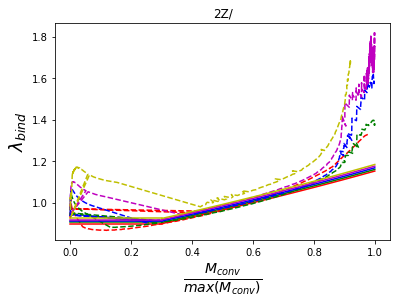

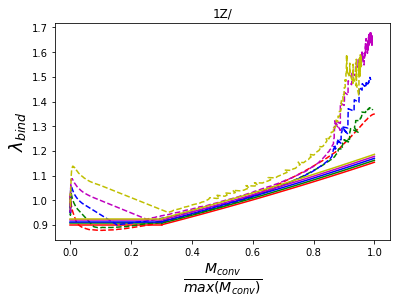

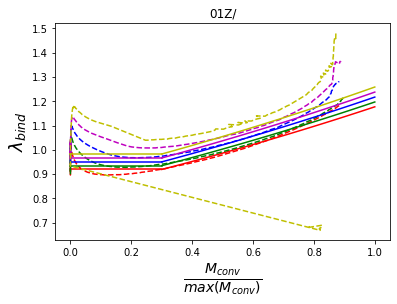

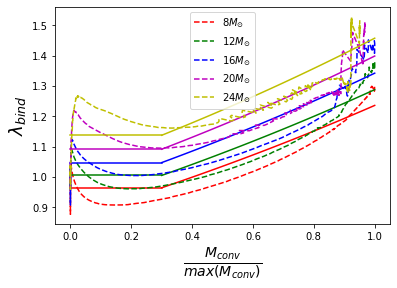

In [118]:
energy_string = 'Ebind'
star_mass = np.array([8,12,16,20,24])
colour = ['r','g','b','m','y']
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

grads = quad(log_m,*data.Ebind_linear_grad_quad_fit)
ave_intercept = data.Ebind_average_intercept[0]
ave_grad = data.Ebind_average_grad[0]

z2_inter = linear(star_mass, grads[0], ave_intercept)
z1_inter = linear(star_mass, grads[1], ave_intercept)
z01_inter = linear(star_mass, grads[2], ave_intercept)
z001_inter = linear(star_mass, grads[3], ave_intercept)
up_dom = np.linspace(0.3,1,100)
low_dom = np.linspace(0,0.3,20)
for i in Z_dir:
    plt.ylabel('$\\lambda_{bind}$', fontsize=18)
    plt.xlabel('$\\frac{M_{conv}}{max(M_{conv})}$', fontsize=20)
    if i == '2Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ebind_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = ave_grad*up_dom[0] + z2_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(ave_grad*up_dom + z2_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
        
    elif i == '1Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ebind_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = ave_grad*up_dom[0] + z1_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(ave_grad*up_dom + z1_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
    elif i == '01Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ebind_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = ave_grad*up_dom[0] + z01_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(ave_grad*up_dom + z01_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
    elif i == '001Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ebind_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = ave_grad*up_dom[0] + z001_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$', linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(ave_grad*up_dom + z001_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_etot_fit.pdf')
        plt.show()        
      
      

        

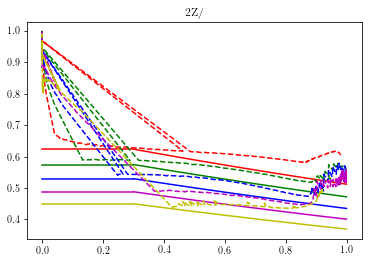

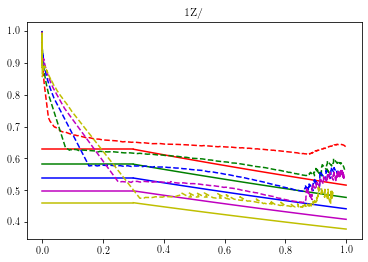

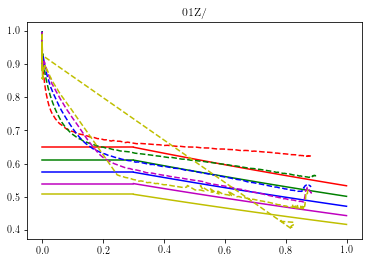

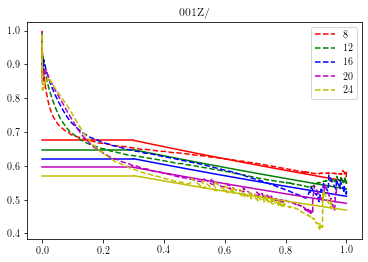

In [4]:
energy_string = 'Egrav'
colour = ['r','g','b','m','y']
star_mass = np.array([8,12,16,20,24])
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

Egrav_gradients = quad(log_m,*data.Egrav_linear_grad_quad_fit)
intercept = data.Ebind_average_intercept[0]
grad = data.Egrav_average_grad[0]

z2_inter = linear(star_mass, Egrav_gradients[0], intercept)
z1_inter = linear(star_mass, Egrav_gradients[1], intercept)
z01_inter = linear(star_mass, Egrav_gradients[2], intercept)
z001_inter = linear(star_mass, Egrav_gradients[3], intercept)

up_dom = np.linspace(0.3,1,100)
low_dom = np.linspace(0,0.3,20)
for i in Z_dir:
    if i == '2Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Egrav_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z2_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z2_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
        
    elif i == '1Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Egrav_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z1_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z1_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
    elif i == '01Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Egrav_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z01_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z01_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.show()
    elif i == '001Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Egrav_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z001_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z001_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
            plt.title(i)
        plt.legend()
        plt.show()        
      

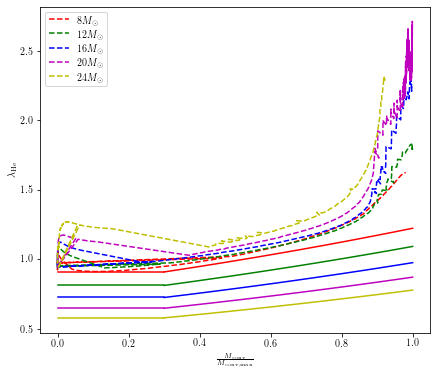

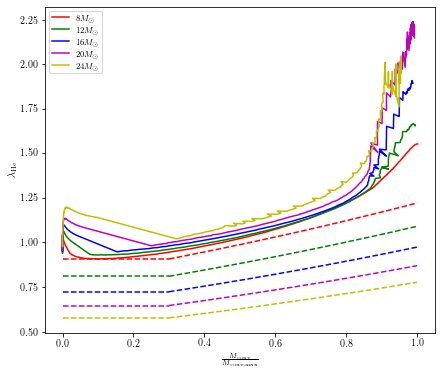

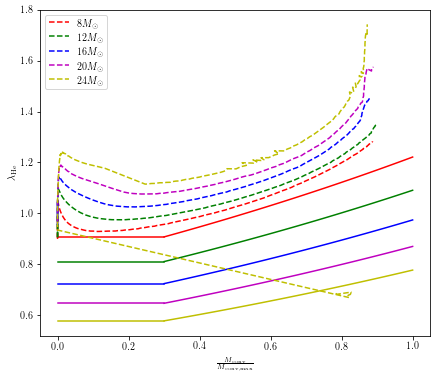

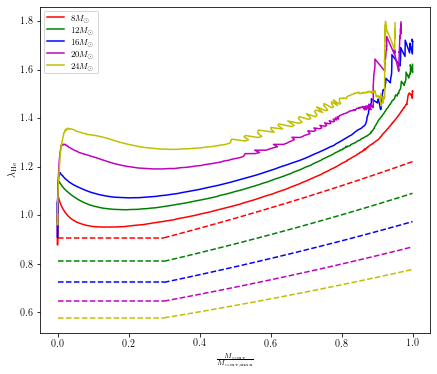

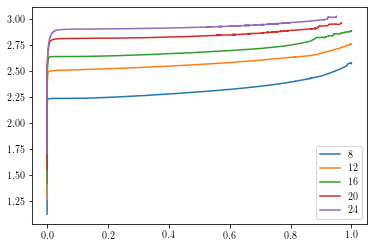

In [17]:
energy_string = 'Ehe'
colour = ['r','g','b','m','y']
star_mass = np.array([8,12,16,20,24])
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

Ehe_gradients = quad(log_m,*data.Ehe_linear_grad_quad_fit)
# intercept = data.Ehe_average_intercept[0]
grad = data.Ehe_average_grad[0]
def intercept(M,Z):
    return a_1*M + a_2 * Z + a_3

z2_inter = intercept(star_mass,metalicity[0])
z1_inter = intercept(star_mass,metalicity[1])
z01_inter = intercept(star_mass,metalicity[2])
z001_inter = intercept(star_mass,metalicity[3])

up_dom = np.linspace(0.3,1,100)
low_dom = np.linspace(0,0.3,20)
for i in Z_dir:
    plt.figure(figsize = (7, 6))
    plt.ylabel('$\\lambda_\mathrm{He}$')
    plt.xlabel('$\\frac{M_\mathrm{conv}}{M_\mathrm{conv,max}}$')
    if i == '2Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z2_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$', linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z2_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/2Z_Ehe.pdf')
        plt.show()
        
    elif i == '1Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z1_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z1_inter[j]),c = colour[j], linestyle = '--')
            plt.plot(low_dom, np.exp(low_range),c = colour[j], linestyle = '--')
        plt.legend(fontsize='small')
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/1Z_Ehe.pdf', bbox_inches = 'tight',dpi = 300)
        plt.show()
    elif i == '01Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z01_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$', linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z01_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/01Z_Ehe.pdf')
        plt.show()
    elif i == '001Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z001_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z001_inter[j]),c = colour[j], linestyle = '--')
            plt.plot(low_dom, np.exp(low_range),c = colour[j], linestyle = '--')
        plt.legend(loc = 'upper left',fontsize='small')
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/001Z_Ehe.pdf',bbox_inches='tight',dpi = 300)
        plt.show()

for j in range(len(star_mass)):
    data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/001Z/'+ str(star_mass[j])+'M_data.csv')
    M_conv_max = data.M_conv_max[0]
    plt.plot(data.M_conv_env/M_conv_max,np.log10(data.radius), label = str(star_mass[j]))
    plt.legend()
plt.show()

/home/lewis/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


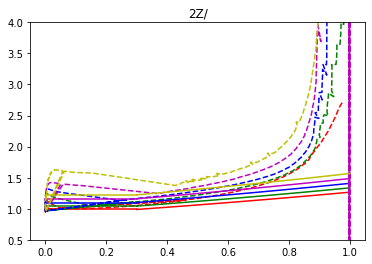

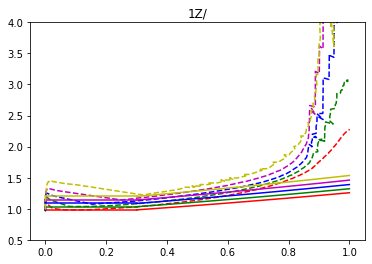

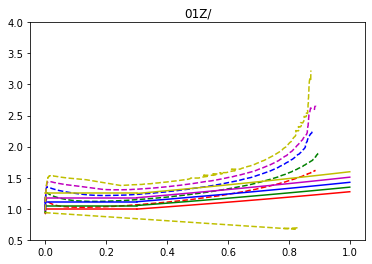

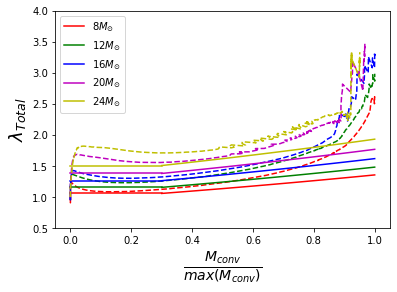

In [3]:
energy_string = 'Etot'
star_mass = np.array([8,12,16,20,24])
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)
colour = ['r','g','b','m','y']

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

Etot_gradients = quad(log_m,*data.Etot_linear_grad_quad_fit)
intercept = data.Ebind_average_intercept[0]
grad = data.Ebind_average_grad[0]

z2_inter = linear(star_mass, Etot_gradients[0], intercept)
z1_inter = linear(star_mass, Etot_gradients[1], intercept)
z01_inter = linear(star_mass, Etot_gradients[2], intercept)
z001_inter = linear(star_mass, Etot_gradients[3], intercept)

up_dom = np.linspace(0.3,1,100)
low_dom = np.linspace(0,0.3,20)
for i in Z_dir:
    if i == '2Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z2_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--', c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z2_inter[j]), c = colour[j])
            plt.plot(low_dom, np.exp(low_range), c = colour[j])
            plt.title(i)
            plt.ylim(0.5,4)
        plt.show()
        
    elif i == '1Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z1_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--', c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z1_inter[j]), c = colour[j])
            plt.plot(low_dom, np.exp(low_range), c = colour[j])
            plt.title(i)
            plt.ylim(0.5,4)
        plt.show()
    elif i == '01Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z01_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]), linestyle = '--', c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z01_inter[j]), c = colour[j])
            plt.plot(low_dom, np.exp(low_range), c = colour[j])
            plt.title(i)
            plt.ylim(0.5,4)
        plt.show()
    elif i == '001Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Etot_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z001_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, linestyle = '--', c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z001_inter[j]), c = colour[j], label = str(star_mass[j]) + '$M_{\odot}$')
            plt.plot(low_dom, np.exp(low_range), c = colour[j])
#             plt.title(i)
        plt.ylim(0.5,4)
        plt.ylabel('$\\lambda_{Total}$', fontsize=18)
        plt.xlabel('$\\frac{M_{conv}}{max(M_{conv})}$', fontsize=20)
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_etot_fit.pdf')
        plt.show()

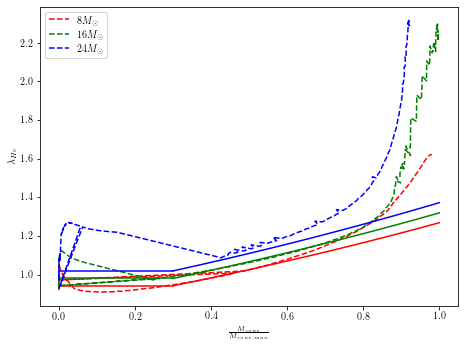

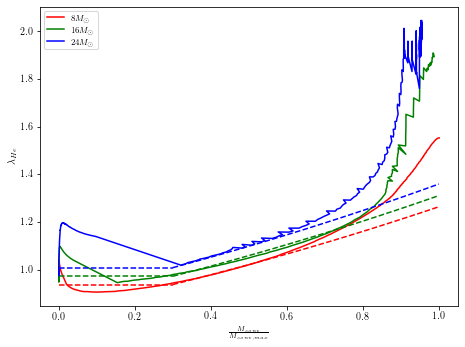

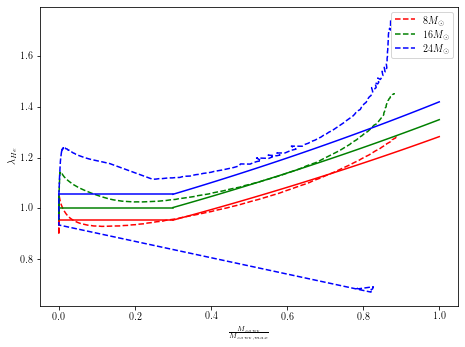

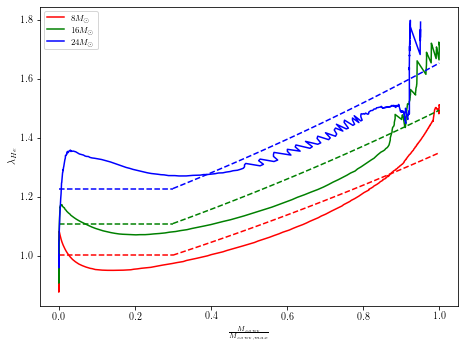

In [5]:
nergy_string = 'Ehe'
colour = ['r','g','b','m','y']
star_mass = np.array([8,16,24])
metalicity = [0.03,0.0142,0.00142,0.000142]
log_m = np.log10(metalicity)

data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')

Ehe_gradients = quad(log_m,*data.Ehe_linear_grad_quad_fit)
intercept = data.Ehe_average_intercept[0]
grad = data.Ehe_average_grad[0]

z2_inter = linear(star_mass, Ehe_gradients[0], intercept)
z1_inter = linear(star_mass, Ehe_gradients[1], intercept)
z01_inter = linear(star_mass, Ehe_gradients[2], intercept)
z001_inter = linear(star_mass, Ehe_gradients[3], intercept)

up_dom = np.linspace(0.3,1,100)
low_dom = np.linspace(0,0.3,20)
for i in Z_dir:
    plt.figure(figsize = (7.5, 5.5))
    plt.ylabel('$\\lambda_{He}$')
    plt.xlabel('$\\frac{M_{conv}}{M_{conv,max}}$')
    if i == '2Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z2_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$', linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z2_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/2Z_Ehe.pdf')
        plt.show()
        
    elif i == '1Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z1_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z1_inter[j]),c = colour[j], linestyle = '--')
            plt.plot(low_dom, np.exp(low_range),c = colour[j], linestyle = '--')
        plt.legend(fontsize='small')
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/1Z_Ehe.pdf', bbox_inches = 'tight',dpi = 300)
        plt.show()
    elif i == '01Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z01_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$', linestyle = '--',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z01_inter[j]),c = colour[j])
            plt.plot(low_dom, np.exp(low_range),c = colour[j])
        plt.legend()
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/01Z_Ehe.pdf')
        plt.show()
    elif i == '001Z/':
        for j in range(len(star_mass)):
            data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/Reduced/'+ i + str(star_mass[j])+'M_data.csv')
            l_ambda = -(G*star_mass[j]*msol*data.M_conv_env*msol)/(data.Ehe_conv*data.radius*rsol)
            log_l = np.log(l_ambda)
            M_conv_max = data.M_conv_max[0]
            turnpoint = grad*up_dom[0] + z001_inter[j]
            low_range = np.full(low_dom.shape, turnpoint)
            plt.plot(data.M_conv_env/M_conv_max, l_ambda, label = str(star_mass[j]) + '$M_{\odot}$',c = colour[j])
            plt.plot(up_dom,np.exp(grad*up_dom + z001_inter[j]),c = colour[j], linestyle = '--')
            plt.plot(low_dom, np.exp(low_range),c = colour[j], linestyle = '--')
        plt.legend(loc = 'upper left',fontsize='small')
        plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/lambda_fits/001Z_Ehe.pdf',bbox_inches='tight',dpi = 300)
        plt.show()

In [22]:
data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/Ehe_fit_param.csv')
for i in data.intercept_001Z:
    print(i)

-0.116474854041184
-0.1433741726436561
-0.1325911641779381
-0.1193504902812858
-0.1040752783960515
-0.0898297582031562
-0.0830983646901544
-0.0772541974830385
-0.067107067928094
-0.0559371928604763
-0.0393846426950172
-0.0149635498149678
0.0082299505997649
0.0233884436154988
0.0332941870960388
0.0496996154856504
0.0676813524710972
0.0771087203461399


In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Given data for Z = 0.3
M_0_3 = np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
C_0_3 = np.array([-0.152884, -0.179084, -0.191655, -0.184460, -0.181173, -0.177320, -0.173978, -0.168163, -0.161813, -0.155103, -0.148636, -0.140733, -0.132929, -0.125395, -0.114176, -0.099808, -0.079820, -0.070542])

# Given data for Z = 0.142
M_0_142 = np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
C_0_142 = np.array([-0.1460804412544423, -0.1817557672034204, -0.1797950963714096, -0.1789160636983997, -0.1779343643756266, -0.1758195867626141, -0.173659707287288, -0.1710823002229569, -0.1687368530546007, -0.1617025369475141, -0.1572741734317677, -0.1519035165924795, -0.1462897864805267, -0.1396365405749504, -0.1334645108880314, -0.1264762271009938, -0.1174735650131309, -0.1059386131438696])

# Given data for Z = 0.00142
M_0_00142 = np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
C_0_00142 = np.array([-0.1450818883759099, -0.1834706355349786, -0.1785702379077598, -0.1723029546521239, -0.1659432279603585, -0.1577908491024424, -0.1486144249993585, -0.1392542693683351, -0.1280493073534286, -0.116232344031588, -0.1072583947390064, -0.0997152722257457, -0.0889557915648039, -0.0809373805975566, -0.0706191725742686, -0.062252808768668, -0.0830927889704611, -0.0619092735521902])

# Given data for Z = 0.000142
M_0_000142 = np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
C_0_000142 = np.array([-0.116474854041184, -0.1433741726436561, -0.1325911641779381, -0.1193504902812858, -0.1040752783960515, -0.0898297582031562, -0.0830983646901544, -0.0772541974830385, -0.067107067928094, -0.0559371928604763, -0.0393846426950172, -0.0149635498149678, 0.0082299505997649, 0.0233884436154988, 0.0332941870960388, 0.0496996154856504, 0.0676813524710972, 0.0771087203461399])

# Stack the data for all values of Z
M_all = np.concatenate((M_0_3, M_0_142, M_0_00142, M_0_000142))
Z_all = np.array([0.3] * len(M_0_3) + [0.142] * len(M_0_142) + [0.00142] * len(M_0_00142) + [0.000142] * len(M_0_000142))
C_all = np.concatenate((C_0_3, C_0_142, C_0_00142, C_0_000142))

# Reshape M and Z for linear regression
M_Z_combined = np.column_stack((M_all, Z_all))

# Fit the linear regression model
model = LinearRegression()
model.fit(M_Z_combined, C_all)

# Extract the coefficients
a_1, a_2 = model.coef_
a_3 = model.intercept_

print(f"C(M,Z) = {a_1}*M + {a_2}*Z + {a_3}")


C(M,Z) = 0.007126671760690697*M + -0.23610029673123073*Z + -0.20023612903323001


In [53]:
a_1*M_0_3[16] + a_2 * 0.000142 + a_3

-0.03635620477947982

In [54]:
print(C_0_000142[16],M_0_000142[16])

0.0676813524710972 23


In [29]:
data = pd.read_csv('/home/lewis/Documents/Honours_Research/data/csv/Lambda/final_params.csv')
print(data.Ebind_average_intercept[0])
data


-0.2242659908215785


,Ebind_linear_grad_quad_fit,Ebind_average_grad,Ebind_average_intercept,Egrav_linear_grad_quad_fit,Egrav_average_grad,Egrav_average_intercept,Ehe_linear_grad_quad_fit,Ehe_average_grad,Ehe_average_intercept,Etot_linear_grad_quad_fit,Etot_average_grad,Etot_average_intercept
0,0.001818,0.353743,-0.224266,0.000478,-0.281401,-0.17072,0.002258,0.424837,-0.226417,0.003204,0.647952,-0.265945
1,0.006063,0.353743,-0.224266,-0.001716,-0.281401,-0.17072,0.008775,0.424837,-0.226417,0.013445,0.647952,-0.265945
2,0.006712,0.353743,-0.224266,-0.024152,-0.281401,-0.17072,0.013040,0.424837,-0.226417,0.026373,0.647952,-0.265945


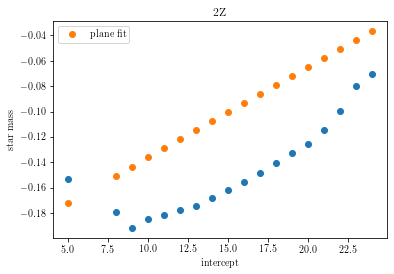

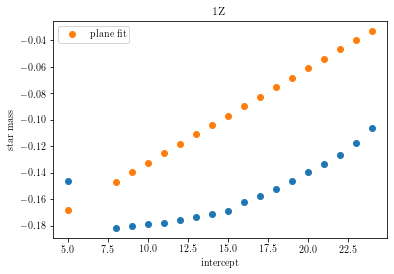

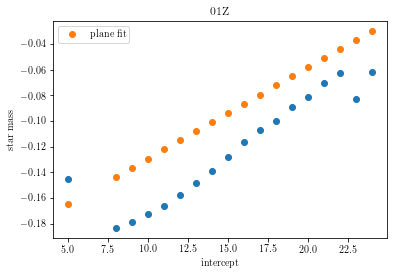

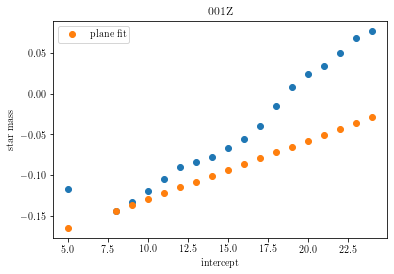

In [52]:
z_arr = [0.03,0.0142,0.00142,0.000142]
z_str = ['2Z', '1Z', '01Z', '001Z']
for i,z in enumerate(z_arr):
    plt.ylabel('star mass')
    plt.xlabel('intercept')
    if i ==0:
        plt.title('2Z')
        plt.scatter(M_0_3,C_0_3)
        plt.scatter(M_0_3,a_1*M_0_3 + a_2 * z + a_3,label = 'plane fit')
    if i ==1:
        plt.title('1Z')
        plt.scatter(M_0_3,C_0_142)
        plt.scatter(M_0_3,a_1*M_0_3 + a_2 * z + a_3,label = 'plane fit')
    if i ==2:
        plt.title('01Z')
        plt.scatter(M_0_3,C_0_00142)
        plt.scatter(M_0_3,a_1*M_0_3 + a_2 * z + a_3,label = 'plane fit')    
    if i ==3:
        plt.title('001Z')
        plt.scatter(M_0_3,C_0_000142)
        plt.scatter(M_0_3,a_1*M_0_3 + a_2 * z + a_3,label = 'plane fit')
    plt.legend()
    plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/RYO/lambda/'+ z_str[i]+'.pdf')
    plt.show()

In [8]:
import numpy as np
from scipy.optimize import curve_fit

# Given data
M = np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
Z_values = np.array([0.3, 0.142, 0.00142, 0.000142])
C_values = np.array([
    [-0.152884, -0.179084, -0.191655, -0.184460, -0.181173, -0.177320, -0.173978, -0.168163, -0.161813, -0.155103, -0.148636, -0.140733, -0.132929, -0.125395, -0.114176, -0.099808, -0.079820, -0.070542],
    [-0.1460804412544423, -0.1817557672034204, -0.1797950963714096, -0.1789160636983997, -0.1779343643756266, -0.1758195867626141, -0.173659707287288, -0.1710823002229569, -0.1687368530546007, -0.1617025369475141, -0.1572741734317677, -0.1519035165924795, -0.1462897864805267, -0.1396365405749504, -0.1334645108880314, -0.1264762271009938, -0.1174735650131309, -0.1059386131438696],
    [-0.1450818883759099, -0.1834706355349786, -0.1785702379077598, -0.1723029546521239, -0.1659432279603585, -0.1577908491024424, -0.1486144249993585, -0.1392542693683351, -0.1280493073534286, -0.116232344031588, -0.1072583947390064, -0.0997152722257457, -0.0889557915648039, -0.0809373805975566, -0.0706191725742686, -0.062252808768668, -0.0830927889704611, -0.0619092735521902],
    [-0.116474854041184, -0.1433741726436561, -0.1325911641779381, -0.1193504902812858, -0.1040752783960515, -0.0898297582031562, -0.0830983646901544, -0.0772541974830385, -0.067107067928094, -0.0559371928604763, -0.0393846426950172, -0.0149635498149678, 0.0082299505997649, 0.0233884436154988, 0.0332941870960388, 0.0496996154856504, 0.0676813524710972, 0.0771087203461399]
])

# Function to fit the data using a polynomial equation
def polynomial_equation(MZ, a_1, a_2, a_3, a_4, a_5):
    M, Z = MZ
    return a_1 * M + a_2 * Z + a_3 * M**2 + a_4 * Z**2 + a_5 * M * Z

# Initial guess for the coefficients
initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]

# Reshape the input data
MZ_combined = np.column_stack((np.repeat(M, len(Z_values)), np.tile(Z_values, len(M))))

# Fit the data using curve_fit
params, covariance = curve_fit(polynomial_equation, MZ_combined.T, C_values.flatten(), p0=initial_guess)

# Extract the fitted coefficients
a_1, a_2, a_3, a_4, a_5 = params

# Print the fitted equation
print(f"C(M,Z) = {a_1}*M + {a_2}*Z + {a_3}*M^2 + {a_4}*Z^2 + {a_5}*M*Z")


C(M,Z) = -0.028299770875454773*M + 0.022892274293861852*Z + 0.001217812498629566*M^2 + 0.014330720680003111*Z^2 + -0.0038551985534862766*M*Z


0.03


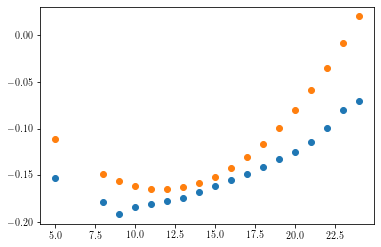

0.0142


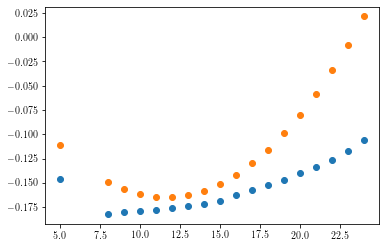

0.00142


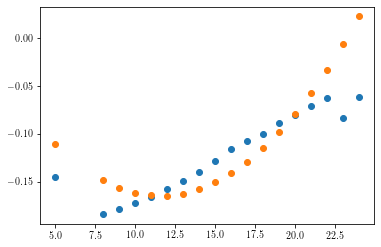

0.000142


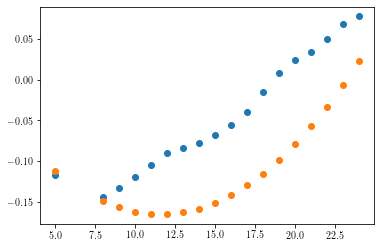

In [44]:
z_arr = np.array([0.03,0.0142,0.00142,0.000142])

for i,z in enumerate(z_arr):
    print(z)
    plt.scatter(M,C_values[i])
    c = a_1*M + a_2 *z + a_3*M**2 +a_4*z**2 + a_5*M*z
    plt.scatter(M,c)
    plt.show()

<IPython.core.display.Javascript object>


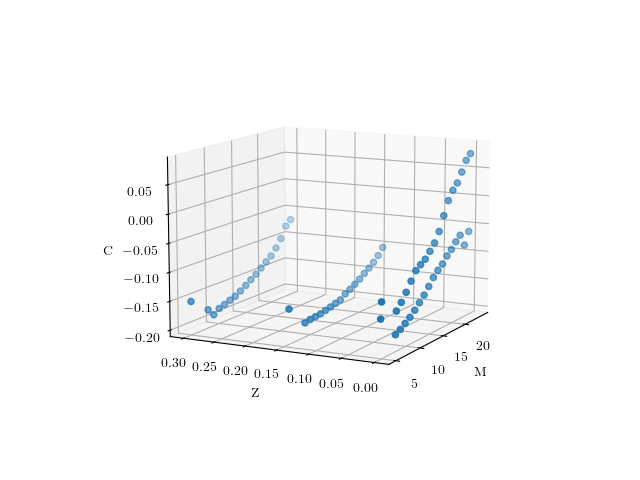

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given data
M, Z = np.meshgrid(np.array([5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]), np.array([0.3, 0.142, 0.00142, 0.000142]))
C = np.array([
    [-0.152884, -0.179084, -0.191655, -0.184460, -0.181173, -0.177320, -0.173978, -0.168163, -0.161813, -0.155103, -0.148636, -0.140733, -0.132929, -0.125395, -0.114176, -0.099808, -0.079820, -0.070542],
    [-0.1460804412544423, -0.1817557672034204, -0.1797950963714096, -0.1789160636983997, -0.1779343643756266, -0.1758195867626141, -0.173659707287288, -0.1710823002229569, -0.1687368530546007, -0.1617025369475141, -0.1572741734317677, -0.1519035165924795, -0.1462897864805267, -0.1396365405749504, -0.1334645108880314, -0.1264762271009938, -0.1174735650131309, -0.1059386131438696],
    [-0.1450818883759099, -0.1834706355349786, -0.1785702379077598, -0.1723029546521239, -0.1659432279603585, -0.1577908491024424, -0.1486144249993585, -0.1392542693683351, -0.1280493073534286, -0.116232344031588, -0.1072583947390064, -0.0997152722257457, -0.0889557915648039, -0.0809373805975566, -0.0706191725742686, -0.062252808768668, -0.0830927889704611, -0.0619092735521902],
    [-0.116474854041184, -0.1433741726436561, -0.1325911641779381, -0.1193504902812858, -0.1040752783960515, -0.0898297582031562, -0.0830983646901544, -0.0772541974830385, -0.067107067928094, -0.0559371928604763, -0.0393846426950172, -0.0149635498149678, 0.0082299505997649, 0.0233884436154988, 0.0332941870960388, 0.0496996154856504, 0.0676813524710972, 0.0771087203461399]
])

# Flatten M, Z, and C arrays for scatter plot
M_flat = M.flatten()
Z_flat = Z.flatten()
C_flat = C.flatten()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(M_flat, Z_flat, C_flat)

# Set labels
ax.set_xlabel('M')
ax.set_ylabel('Z')
ax.set_zlabel('C')

plt.show()
